<a href="https://colab.research.google.com/github/Rahul-131201/Diabetic-Macular-Edema-Grading-Using-Deep-Learning/blob/main/Edema_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing requiremnets

In [ ]:
!pip install unrar
!unrar x "/content/drive/MyDrive/Dataset/Imagenes.rar"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/Dataset/Imagenes.rar

Creating    Imagenes                                                  OK
Extracting  Imagenes/IDRiD_001.jpg                                         0%  OK 
Extracting  Imagenes/IDRiD_001test.jpg                                     0%  OK 
Extracting  Imagenes/IDRiD_002.jpg                                         0%  OK 
Extracting  Imagenes/IDRiD_003.jpg                                         0%  OK 
Extracting  Imagenes/IDRiD_004.jpg                                         0%  OK 
Extracting  Imagenes/IDRiD_004test.jpg                                     1%  OK 
Extracting  Imagenes/IDRiD_005.jpg                                         1%  OK 
Extracting  Imagenes/IDRiD_005test.jpg                                     1%  OK 
Extracting  Imagenes/IDRiD_006.jpg                    

In [ ]:
!pip install pandas
!pip install tensorflow
!pip install scikit-learn
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 31.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
img_width, img_height = 150, 150
data_file = '/content/idrid_labels.csv'
epochs = 20
batch_size = 16
num_classes = 3

In [ ]:
df = pd.read_csv(data_file)

In [ ]:
df.head(5)

,id_code,diagnosis,Risk of macular edema,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,IDRiD_001,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IDRiD_002,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IDRiD_003,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IDRiD_004,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IDRiD_005,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[['id_code', 'diagnosis', 'Risk of macular edema ']]
df.head(5)

,id_code,diagnosis,Risk of macular edema
0,IDRiD_001,3,2
1,IDRiD_002,3,2
2,IDRiD_003,2,2
3,IDRiD_004,3,2
4,IDRiD_005,4,0


In [ ]:
df.columns

Index(['id_code', 'diagnosis', 'Risk of macular edema '], dtype='object')

In [ ]:
df.dropna(axis=1, how='all')

,id_code,diagnosis,Risk of macular edema
0,IDRiD_001,3,2
1,IDRiD_002,3,2
2,IDRiD_003,2,2
3,IDRiD_004,3,2
4,IDRiD_005,4,0
...,...,...,...
450,IDRiD_096test,0,0
451,IDRiD_100test,2,1
452,IDRiD_101test,1,0
453,IDRiD_102test,2,2


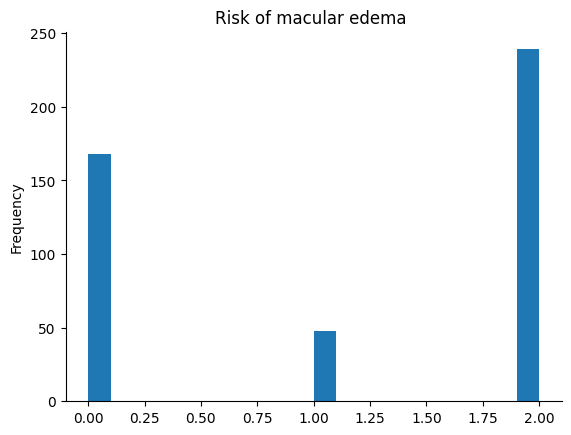

In [ ]:
from matplotlib import pyplot as plt
df['Risk of macular edema '].plot(kind='hist', bins=20, title='Risk of macular edema ')
plt.gca().spines[['top', 'right',]].set_visible(False)

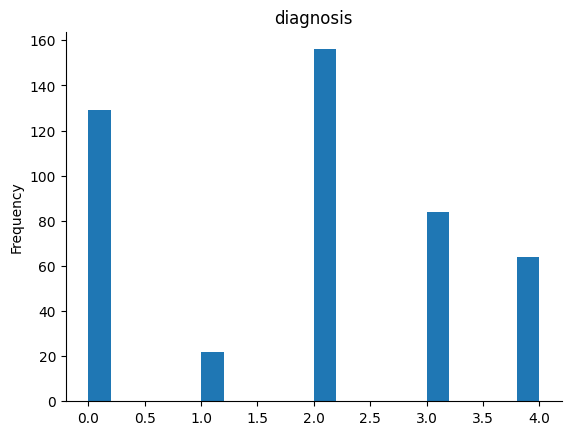

In [ ]:
from matplotlib import pyplot as plt
df['diagnosis'].plot(kind='hist', bins=20, title='diagnosis')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df= df.dropna(axis =1)

In [ ]:
df=df.rename(columns={'Risk of macular edema ': 'risk'})

In [ ]:
df.columns

Index(['id_code', 'diagnosis', 'risk'], dtype='object')

In [ ]:
df["risk"].unique()

array([2, 0, 1])

In [ ]:
df["diagnosis"].unique()

array([3, 2, 4, 1, 0])

In [ ]:
df.dtypes

id_code      object
diagnosis     int64
risk          int64
dtype: object

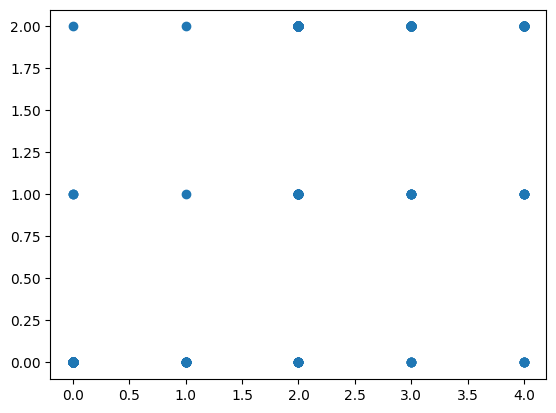

In [ ]:
plt.scatter(df["diagnosis"], df["risk"])
plt.show()

## To store images into dataset

In [ ]:
def get_image_pixels(image_path):
  try:
    img = cv2.imread("/content/Imagenes/"+ image_path +".jpg")
    print("/content/Imagenes/"+ image_path +".jpg")
    pixels = img.flatten()
    return pixels
  except Exception as e:
    print(f"Error processing {image_path}: {str(e)}")
    return None

In [ ]:
result_df = pd.DataFrame(columns=['id_code', 'pixels'])
result_df.to_csv('data_with_pixels.csv', index=False)

for index, row in df.iterrows():
  dat = pd.read_csv('data_with_pixels.csv')
  id_code = row['id_code']
  pixels = get_image_pixels(id_code)
  if pixels is not None:
    dat = dat.append({'id_code': id_code, 'pixels': pixels}, ignore_index=True)
  else:
    pass
  dat.to_csv('data_with_pixels.csv', index=False)

dat.dropna(subset=['pixels'], inplace=True)
dat.to_csv('data_with_pixels.csv', index=False)

/content/Imagenes/IDRiD_001.jpg


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
pix_df = pd.read_csv('data_with_pixels.csv')
pix_df.head(5)

,id_code,pixels
0,IDRiD_001,[0 0 0 ... 9 0 0]
1,IDRiD_002,[0 0 0 ... 0 0 0]
2,IDRiD_003,[0 0 0 ... 9 0 0]
3,IDRiD_004,[0 0 0 ... 0 0 0]
4,IDRiD_005,[0 0 0 ... 4 0 0]


## Image Preprocessing

In [ ]:
import os
import cv2
import numpy as np
from skimage import exposure, filters

image_dir = '/content/Imagenes'

target_width = 224
target_height = 224

for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):

        img = cv2.imread(os.path.join(image_dir, filename))

        img_resized = cv2.resize(img, (target_width, target_height))

        img_denoised = cv2.GaussianBlur(img_resized, (5, 5), 0)

        img_clahe = exposure.equalize_adapthist(img_denoised)

        img_normalized = cv2.normalize(img_clahe, None, 0, 255, cv2.NORM_MINMAX)

        output_path = os.path.join('/content/Processed_Images', filename)
        cv2.imwrite(output_path, img_normalized)

        print(f"{output_path} processed and saved.")


/content/Processed_Images/IDRiD_062.jpg processed and saved.
/content/Processed_Images/IDRiD_314.jpg processed and saved.
/content/Processed_Images/IDRiD_199.jpg processed and saved.
/content/Processed_Images/IDRiD_002.jpg processed and saved.
/content/Processed_Images/IDRiD_094.jpg processed and saved.
/content/Processed_Images/IDRiD_012.jpg processed and saved.
/content/Processed_Images/IDRiD_244.jpg processed and saved.
/content/Processed_Images/IDRiD_069test.jpg processed and saved.
/content/Processed_Images/IDRiD_356.jpg processed and saved.
/content/Processed_Images/IDRiD_067test.jpg processed and saved.
/content/Processed_Images/IDRiD_365.jpg processed and saved.
/content/Processed_Images/IDRiD_016test.jpg processed and saved.
/content/Processed_Images/IDRiD_371.jpg processed and saved.
/content/Processed_Images/IDRiD_133.jpg processed and saved.
/content/Processed_Images/IDRiD_033test.jpg processed and saved.
/content/Processed_Images/IDRiD_313.jpg processed and saved.
/content

In [ ]:
import os
import cv2

image_dir = '/content/Imagenes'
output_dir = '/content/Processed_Images'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

target_size = (224, 224)
sigma = 1.0

for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img = cv2.imread(os.path.join(image_dir, filename))
        # Resize the image
        # img_resized = cv2.resize(img, target_size)

        # Denoising using Gaussian Filter
        img_denoised = cv2.GaussianBlur(img, (3, 3), sigma)

        # CLAHE (Contrast Limited Adaptive Histogram Equalization)
        img_clahe = exposure.equalize_adapthist(img)

        # Intensity Normalization
        img_normalized = exposure.rescale_intensity(img_clahe, in_range='image', out_range=(0, 1))

        output_path = os.path.join(output_dir, filename)
        cv2.imwrite(output_path, img_denoised)
        print(f"{output_path} processed and saved.")
        break



/content/Processed_Images/IDRiD_062.jpg processed and saved.


## Splitting dataset

In [ ]:
# Features and target
X = df['diagnosis']  # Using 'diagnosis' as a feature for illustration, add more features as needed
y = df['risk'].astype(str)

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y, num_classes=num_classes)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_test)

302    2
39     2
393    3
411    4
155    0
      ..
450    0
137    0
93     4
57     2
154    3
Name: diagnosis, Length: 91, dtype: int64


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
df["diagnosis"] = df["diagnosis"].astype('str')
df["risk"] = df["risk"].astype('str')
df.dtypes

id_code      object
diagnosis    object
risk         object
dtype: object

In [ ]:
df['id_code'] = df['id_code'].apply(lambda x: x + ".jpg")
print(df.head())

         id_code diagnosis risk
0  IDRiD_001.jpg         3    2
1  IDRiD_002.jpg         3    2
2  IDRiD_003.jpg         2    2
3  IDRiD_004.jpg         3    2
4  IDRiD_005.jpg         4    0


In [ ]:
df.shape

(455, 3)

In [ ]:
columns = ['diagnosis', 'risk']
train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory='/content/Imagenes',
    x_col='id_code',
    y_col='risk',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    dtype='str'
)

Found 364 validated image filenames belonging to 3 classes.


In [ ]:
validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory='/content/Imagenes',  # Same directory as above
    x_col='id_code',
    y_col='risk',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 91 validated image filenames belonging to 3 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
!mkdir "/content/models"

In [ ]:
from keras.callbacks import ModelCheckpoint

best_accuracy_model_path = '/content/models/best_model_accuracy.h5'
each_epoch_model_path = '/content/models/model_epoch_{epoch}.h5'

checkpoint_best_accuracy = ModelCheckpoint(best_accuracy_model_path,
                                           monitor='val_accuracy',
                                           save_best_only=True, mode='max',
                                           verbose=1)

checkpoint_each_epoch = ModelCheckpoint(each_epoch_model_path,
                                        save_weights_only=False,
                                        verbose=1)

In [ ]:
# tf.keras.backend.set_value(model.optimizer.lr,1e-3)
history = model.fit(
    train_generator,
    batch_size=13,
    epochs=20,
    validation_data=validation_generator,
    shuffle=True,
    callbacks=[checkpoint_best_accuracy, checkpoint_each_epoch]
)

Epoch 1/20
23/23 [==============================] - ETA: 0s - loss: 1.0848 - accuracy: 0.4368
Epoch 1: val_accuracy improved from -inf to 0.69231, saving model to /content/models/best_model_accuracy.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 1: saving model to /content/models/model_epoch_1.h5
23/23 [==============================] - 39s 1s/step - loss: 1.0848 - accuracy: 0.4368 - val_loss: 0.9803 - val_accuracy: 0.6923
Epoch 2/20
23/23 [==============================] - ETA: 0s - loss: 0.9686 - accuracy: 0.4176
Epoch 2: val_accuracy improved from 0.69231 to 0.70330, saving model to /content/models/best_model_accuracy.h5

Epoch 2: saving model to /content/models/model_epoch_2.h5
23/23 [==============================] - 28s 1s/step - loss: 0.9686 - accuracy: 0.4176 - val_loss: 0.9963 - val_accuracy: 0.7033
Epoch 3/20
23/23 [==============================] - ETA: 0s - loss: 0.9302 - accuracy: 0.5577
Epoch 3: val_accuracy did not improve from 0.70330

Epoch 3: saving model to /content/models/model_epoch_3.h5
23/23 [==============================] - 28s 1s/step - loss: 0.9302 - accuracy: 0.5577 - val_loss: 0.9993 - val_accuracy: 0.6593
Epoch 4/20
23/23 [==============================] - ETA: 0s - loss: 0.9054 - accuracy:

In [ ]:
from keras.models import load_model
model1 = load_model('/content/models/best_model_accuracy.h5')

history1 = model1.fit(
    train_generator,
    batch_size=13,
    initial_epoch=20,
    epochs=40,
    validation_data=validation_generator,
    shuffle=True,
    callbacks=[checkpoint_best_accuracy, checkpoint_each_epoch]
)

Epoch 21/40
12/23 [==============>...............] - ETA: 9s - loss: 0.9837 - accuracy: 0.5000

KeyboardInterrupt: 

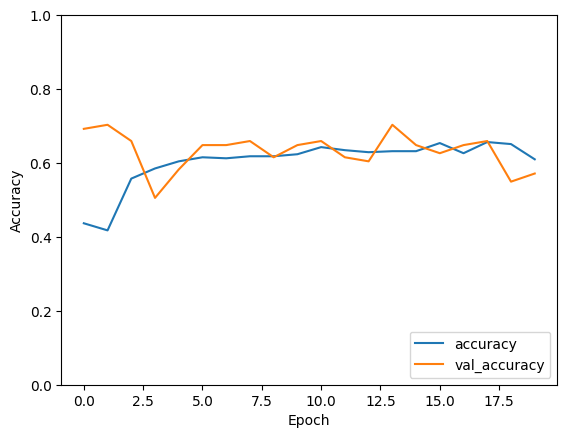

In [ ]:
# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

## VGG16

In [ ]:
import os

source_directory = "/content/Imagenes"
destination_directory = "/content/test"

for filename in os.listdir(source_directory):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')) and 'test' in filename:
        source_file = os.path.join(source_directory, filename)
        destination_file = os.path.join(destination_directory, filename)
        os.rename(source_file, destination_file)

FileNotFoundError: [Errno 2] No such file or directory: '/content/Imagenes'

In [ ]:
!mv "/content/Imagenes" "/content/train"

!mkdir "/content/test/0"
!mkdir "/content/test/1"
!mkdir "/content/test/2"

!mkdir "/content/train/0"
!mkdir "/content/train/1"
!mkdir "/content/train/2"

mv: cannot stat '/content/Imagenes': No such file or directory
mkdir: cannot create directory ‘/content/test/0’: No such file or directory
mkdir: cannot create directory ‘/content/test/1’: No such file or directory
mkdir: cannot create directory ‘/content/test/2’: No such file or directory
mkdir: cannot create directory ‘/content/train/0’: File exists
mkdir: cannot create directory ‘/content/train/1’: File exists
mkdir: cannot create directory ‘/content/train/2’: File exists


In [ ]:
import os

def move_images(df):
    for index, row in df.iterrows():
        image_path = row['id_code']
        risk_value = str(row['risk'])

        if 'test' in image_path:
            image_path = os.path.join("/content/test", image_path)
            destination_folder = os.path.join('/content/test', risk_value)
        else:
            image_path = os.path.join("/content/train", image_path)
            destination_folder = os.path.join('/content/train', risk_value)

        destination_file = os.path.join(destination_folder, os.path.basename(image_path))

        os.rename(image_path, destination_file)

move_images(df)

In [ ]:
!rm -r "/content/train/.ipynb_checkpoints"
!rm -r "/content/test/.ipynb_checkpoints"

In [ ]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

input_shape = (224, 224, 3)

# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for classification
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(3, activation='softmax')(x)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

train_dir = '/content/train'
test_dir = '/content/test'

batch_size = 32
image_size = (224, 224)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

history = model.fit(train_generator,
          steps_per_epoch=train_generator.samples // batch_size,
          epochs=20,
          validation_data=test_generator,
          validation_steps=test_generator.samples // batch_size)

score = model.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [ ]:
from sklearn.metrics import classification_report

test_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred = test_pred.argmax(axis=-1)

# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

In [ ]:
# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

## VGG19

In [ ]:
from keras.applications import VGG19
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/train'
test_dir = '/content/test'

batch_size = 32
image_size = (224, 224)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

history = model.fit(train_generator,
          steps_per_epoch=train_generator.samples // batch_size,
          epochs=10,
          validation_data=test_generator,
          validation_steps=test_generator.samples // batch_size)

score = model.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save('model.h5')
print("Model saved successfully.")

80134624/80134624 [==============================] - 0s 0us/step
Found 375 images belonging to 3 classes.
Found 80 images belonging to 3 classes.
Epoch 1/10
11/11 [==============================] - 33s 3s/step - loss: 9.1205 - accuracy: 0.4431 - val_loss: 5.2557 - val_accuracy: 0.5781
Epoch 2/10
11/11 [==============================] - 30s 3s/step - loss: 2.0996 - accuracy: 0.4402 - val_loss: 0.9263 - val_accuracy: 0.5625
Epoch 3/10
11/11 [==============================] - 29s 3s/step - loss: 1.0624 - accuracy: 0.5918 - val_loss: 1.1836 - val_accuracy: 0.4688
Epoch 4/10
11/11 [==============================] - 38s 4s/step - loss: 0.8708 - accuracy: 0.6647 - val_loss: 0.8996 - val_accuracy: 0.5781
Epoch 5/10
11/11 [==============================] - 32s 3s/step - loss: 0.7654 - accuracy: 0.7055 - val_loss: 0.6843 - val_accuracy: 0.6719
Epoch 6/10
11/11 [==============================] - 34s 3s/step - loss: 0.7232 - accuracy: 0.7074 - val_loss: 0.8973 - val_accuracy: 0.6094
Epoch 7/10
11/

In [ ]:
from sklearn.metrics import classification_report

test_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred = test_pred.argmax(axis=-1)

# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

3/3 [==============================] - 6s 1s/step
              precision    recall  f1-score   support

           0       0.36      0.67      0.46        24
           1       0.00      0.00      0.00         8
           2       0.63      0.46      0.53        48

    accuracy                           0.47        80
   macro avg       0.33      0.38      0.33        80
weighted avg       0.48      0.47      0.46        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


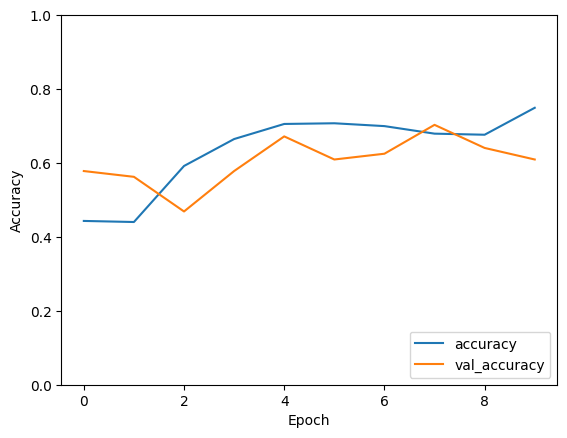

In [ ]:
# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

## ResNet50

Found 375 images belonging to 3 classes.
Found 80 images belonging to 3 classes.
Epoch 1/10
11/11 [==============================] - 42s 2s/step - loss: 8.2768 - accuracy: 0.4665 - val_loss: 212.8021 - val_accuracy: 0.2969
Epoch 2/10
11/11 [==============================] - 28s 3s/step - loss: 5.2765 - accuracy: 0.5743 - val_loss: 235.4398 - val_accuracy: 0.2188
Epoch 3/10
11/11 [==============================] - 29s 3s/step - loss: 3.2717 - accuracy: 0.6035 - val_loss: 1654.7832 - val_accuracy: 0.3281
Epoch 4/10
11/11 [==============================] - 33s 3s/step - loss: 2.4872 - accuracy: 0.5627 - val_loss: 92.7197 - val_accuracy: 0.5625
Epoch 5/10
11/11 [==============================] - 28s 3s/step - loss: 3.1269 - accuracy: 0.5423 - val_loss: 33.2797 - val_accuracy: 0.5000
Epoch 6/10
11/11 [==============================] - 29s 3s/step - loss: 2.5114 - accuracy: 0.5598 - val_loss: 22.7173 - val_accuracy: 0.2969
Epoch 7/10
11/11 [==============================] - 30s 3s/step - los

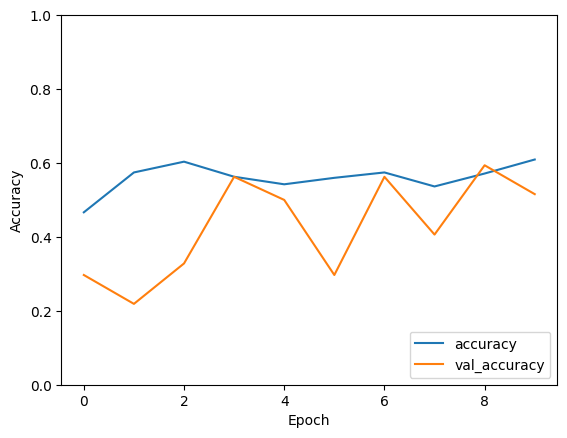

In [ ]:
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, add, Flatten, Dense
from keras.models import Model
from keras.optimizers import Adam

def build_resnet18(input_shape=(224, 224, 3), num_classes=3):
    inputs = Input(shape=input_shape)

    # Stage 1
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    # Stage 2
    x = resnet_block(x, filters=[64, 64])
    x = resnet_block(x, filters=[64, 64])

    # Stage 3
    x = resnet_block(x, filters=[128, 128], strides=(2, 2))
    x = resnet_block(x, filters=[128, 128])

    # Stage 4
    x = resnet_block(x, filters=[256, 256], strides=(2, 2))
    x = resnet_block(x, filters=[256, 256])

    # Stage 5
    x = resnet_block(x, filters=[512, 512], strides=(2, 2))
    x = resnet_block(x, filters=[512, 512])

    # Classifier
    x = Flatten()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

def resnet_block(x, filters, strides=(1, 1)):
    filters1, filters2 = filters
    shortcut = x

    # First convolutional layer
    x = Conv2D(filters1, kernel_size=(3, 3), strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters2, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)

    # Shortcut connection
    if strides != (1, 1) or shortcut.shape[-1] != filters2:
        shortcut = Conv2D(filters2, kernel_size=(1, 1), strides=strides, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = add([x, shortcut])
    x = Activation('relu')(x)
    return x

# Load ResNet-18 model
resnet18_model = build_resnet18(input_shape=(224, 224, 3), num_classes=3)

# Compile ResNet-18 model
resnet18_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/train'
test_dir = '/content/test'

batch_size = 32
image_size = (224, 224)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

history = resnet18_model.fit(train_generator,
          steps_per_epoch=train_generator.samples // batch_size,
          epochs=10,
          validation_data=test_generator,
          validation_steps=test_generator.samples // batch_size)

score = resnet18_model.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

from sklearn.metrics import classification_report

test_pred = resnet18_model.predict(test_generator)
y_true = test_generator.classes
y_pred = test_pred.argmax(axis=-1)

# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, add, Flatten, Dense
from keras.models import Model
from keras.optimizers import Adam

def build_resnet34(input_shape=(224, 224, 3), num_classes=3):
    inputs = Input(shape=input_shape)

    # Stage 1
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    # Stage 2
    x = resnet_block(x, filters=[64, 64])
    x = resnet_block(x, filters=[64, 64])
    x = resnet_block(x, filters=[64, 64])

    # Stage 3
    x = resnet_block(x, filters=[128, 128], strides=(2, 2))
    x = resnet_block(x, filters=[128, 128])
    x = resnet_block(x, filters=[128, 128])
    x = resnet_block(x, filters=[128, 128])

    # Stage 4
    x = resnet_block(x, filters=[256, 256], strides=(2, 2))
    x = resnet_block(x, filters=[256, 256])
    x = resnet_block(x, filters=[256, 256])
    x = resnet_block(x, filters=[256, 256])
    x = resnet_block(x, filters=[256, 256])
    x = resnet_block(x, filters=[256, 256])

    # Stage 5
    x = resnet_block(x, filters=[512, 512], strides=(2, 2))
    x = resnet_block(x, filters=[512, 512])
    x = resnet_block(x, filters=[512, 512])

    # Classifier
    x = Flatten()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

def resnet_block(x, filters, strides=(1, 1)):
    filters1, filters2 = filters
    shortcut = x

    # First convolutional layer
    x = Conv2D(filters1, kernel_size=(3, 3), strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters2, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)

    # Shortcut connection
    if strides != (1, 1) or shortcut.shape[-1] != filters2:
        shortcut = Conv2D(filters2, kernel_size=(1, 1), strides=strides, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = add([x, shortcut])
    x = Activation('relu')(x)
    return x

# Load ResNet-18 model
build_resnet34 = build_resnet34(input_shape=(224, 224, 3), num_classes=3)

# Compile ResNet-18 model
build_resnet34.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/train'
test_dir = '/content/test'

batch_size = 32
image_size = (224, 224)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

history = build_resnet34.fit(train_generator,
          steps_per_epoch=train_generator.samples // batch_size,
          epochs=10,
          validation_data=test_generator,
          validation_steps=test_generator.samples // batch_size)

score = build_resnet34.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

from sklearn.metrics import classification_report

test_pred = build_resnet34.predict(test_generator)
y_true = test_generator.classes
y_pred = test_pred.argmax(axis=-1)

# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

Found 375 images belonging to 3 classes.
Found 80 images belonging to 3 classes.
Epoch 1/10
11/11 [==============================] - 40s 3s/step - loss: 10.9641 - accuracy: 0.2974 - val_loss: 3.0972 - val_accuracy: 0.2656
Epoch 2/10
11/11 [==============================] - 29s 3s/step - loss: 1.8138 - accuracy: 0.3977 - val_loss: 1.0926 - val_accuracy: 0.5938
Epoch 3/10
11/11 [==============================] - 30s 3s/step - loss: 1.0939 - accuracy: 0.5131 - val_loss: 1.0893 - val_accuracy: 0.6094
Epoch 4/10
11/11 [==============================] - 28s 3s/step - loss: 1.0982 - accuracy: 0.4927 - val_loss: 1.0863 - val_accuracy: 0.6094
Epoch 5/10
11/11 [==============================] - 33s 3s/step - loss: 1.0892 - accuracy: 0.5044 - val_loss: 1.0843 - val_accuracy: 0.5781
Epoch 6/10
11/11 [==============================] - 29s 3s/step - loss: 1.0859 - accuracy: 0.5160 - val_loss: 1.0810 - val_accuracy: 0.5781
Epoch 7/10
11/11 [==============================] - 29s 3s/step - loss: 1.0835

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


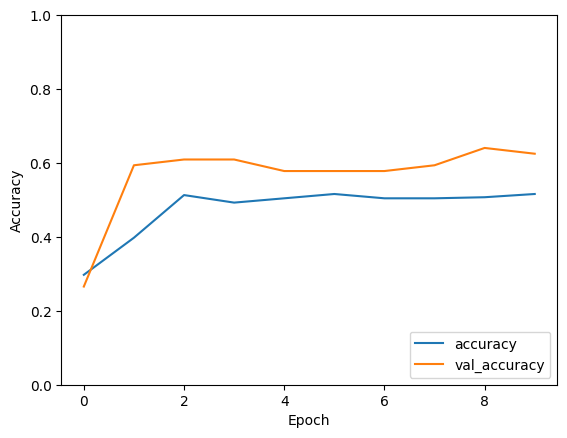

In [ ]:
from keras.applications import ResNet50
from keras.applications import VGG19
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/train'
test_dir = '/content/test'

batch_size = 32
image_size = (224, 224)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

history = model.fit(train_generator,
          steps_per_epoch=train_generator.samples // batch_size,
          epochs=10,
          validation_data=test_generator,
          validation_steps=test_generator.samples // batch_size)

score = model.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

from sklearn.metrics import classification_report

test_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred = test_pred.argmax(axis=-1)

# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

Found 375 images belonging to 3 classes.
Found 80 images belonging to 3 classes.
Epoch 1/10
11/11 [==============================] - 40s 3s/step - loss: 9.2866 - accuracy: 0.3994 - val_loss: 1.9445 - val_accuracy: 0.5781
Epoch 2/10
11/11 [==============================] - 29s 3s/step - loss: 1.4947 - accuracy: 0.4606 - val_loss: 1.1718 - val_accuracy: 0.3438
Epoch 3/10
11/11 [==============================] - 28s 3s/step - loss: 1.0402 - accuracy: 0.4665 - val_loss: 0.9289 - val_accuracy: 0.5938
Epoch 4/10
11/11 [==============================] - 29s 3s/step - loss: 1.0399 - accuracy: 0.5044 - val_loss: 1.1691 - val_accuracy: 0.3125
Epoch 5/10
11/11 [==============================] - 31s 3s/step - loss: 1.1051 - accuracy: 0.4577 - val_loss: 0.9875 - val_accuracy: 0.5781
Epoch 6/10
11/11 [==============================] - 29s 3s/step - loss: 1.3231 - accuracy: 0.5044 - val_loss: 0.9389 - val_accuracy: 0.5781
Epoch 7/10
11/11 [==============================] - 29s 3s/step - loss: 1.2427 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


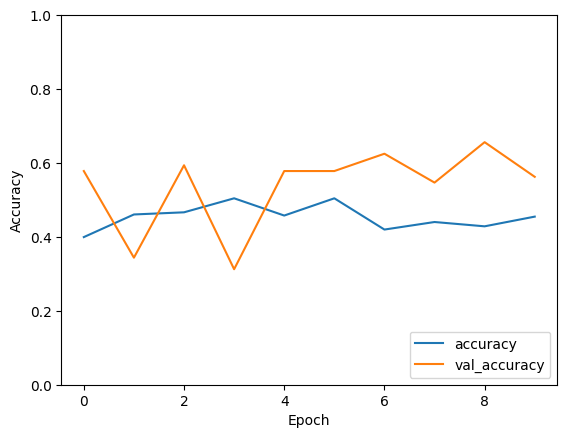

In [ ]:
from keras.applications import ResNet101
from keras.applications import VGG19
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/train'
test_dir = '/content/test'

batch_size = 32
image_size = (224, 224)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

history = model.fit(train_generator,
          steps_per_epoch=train_generator.samples // batch_size,
          epochs=10,
          validation_data=test_generator,
          validation_steps=test_generator.samples // batch_size)

score = model.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

from sklearn.metrics import classification_report

test_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred = test_pred.argmax(axis=-1)

# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

Found 375 images belonging to 3 classes.
Found 80 images belonging to 3 classes.
Epoch 1/10
11/11 [==============================] - 43s 3s/step - loss: 13.4595 - accuracy: 0.4315 - val_loss: 4.9164 - val_accuracy: 0.6562
Epoch 2/10
11/11 [==============================] - 31s 3s/step - loss: 3.9479 - accuracy: 0.3819 - val_loss: 2.6792 - val_accuracy: 0.5781
Epoch 3/10
11/11 [==============================] - 33s 3s/step - loss: 2.3530 - accuracy: 0.4781 - val_loss: 1.2679 - val_accuracy: 0.6094
Epoch 4/10
11/11 [==============================] - 33s 3s/step - loss: 1.1019 - accuracy: 0.4519 - val_loss: 1.0549 - val_accuracy: 0.5781
Epoch 5/10
11/11 [==============================] - 34s 3s/step - loss: 1.0980 - accuracy: 0.5423 - val_loss: 0.9137 - val_accuracy: 0.5938
Epoch 6/10
11/11 [==============================] - 30s 3s/step - loss: 1.3980 - accuracy: 0.4577 - val_loss: 1.9214 - val_accuracy: 0.2812
Epoch 7/10
11/11 [==============================] - 29s 3s/step - loss: 1.8785

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


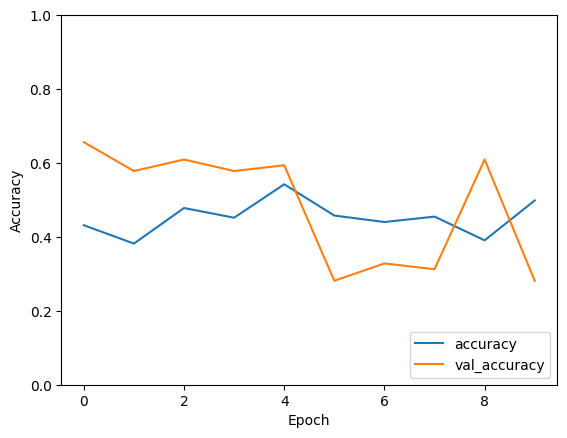

In [ ]:
from keras.applications import ResNet152
from keras.applications import VGG19
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/train'
test_dir = '/content/test'

batch_size = 32
image_size = (224, 224)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

history = model.fit(train_generator,
          steps_per_epoch=train_generator.samples // batch_size,
          epochs=10,
          validation_data=test_generator,
          validation_steps=test_generator.samples // batch_size)

score = model.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

from sklearn.metrics import classification_report

test_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred = test_pred.argmax(axis=-1)

# Generate a classification report
report = classification_report(y_true, y_pred)
print(report)

# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
import os
import cv2
import numpy as np
from keras.models import load_model
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image

model_path = 'model.h5'
image_path = 'ip.jpg'

model = load_model(model_path)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

input_image = preprocess_image(image_path)

preds = model.predict(input_image)
predicted_class_index = np.argmax(preds)
class_labels = ['Risk 0', 'Risk 1', 'Risk 2']

predicted_class = class_labels[predicted_class_index]

print(f"Predicted Class: {predicted_class}")

